# **Initially download all necessary libraries**

In [3]:
#importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **Reading the two datasets - one is train dataset and another is test datatset.**

In [4]:
df=pd.read_csv('/content/train.csv')
dft=pd.read_csv('/content/test.csv')

# **Exploring the dataset - what it looks like**

In [5]:
df.head() # first five rows of dataset 'train'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail() # last five rows of the dataset 'test'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.shape # Dataset contains 890 rows and 12 columns of data and 1 row of header.

(891, 12)

In [8]:
df.columns # list of all columns in the dataset

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.info() # data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Dropping irrelevant columns**

In [10]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [12]:
df.shape

(891, 9)

# **Exploring and treating null values**

In [13]:
df.isnull().sum() # only age, cabin and embarked columns have null values.

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,687
Embarked,2


In [14]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [15]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)

In [16]:
df = df.drop(['Cabin'], axis=1)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [18]:
df['Embarked'].nunique()

3

In [19]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [20]:
df.dropna(subset=['Embarked'], inplace=True)

In [21]:
# Map 'Embarked' categories to numeric values
df['Embarked'] = df['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

print(df['Embarked'].value_counts())

Embarked
1    644
2    168
3     77
Name: count, dtype: int64


In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin
0,0,3,male,22.0,1,0,7.2500,1,0
1,1,1,female,38.0,1,0,71.2833,2,1
2,1,3,female,26.0,0,0,7.9250,1,0
3,1,1,female,35.0,1,0,53.1000,1,1
4,0,3,male,35.0,0,0,8.0500,1,0


In [23]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,312


In [24]:
# Convert categorical text values into numerical codes for model compatibility
# 'Sex': male → 0, female → 1
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin
0,0,3,0,22.0,1,0,7.2500,1,0
1,1,1,1,38.0,1,0,71.2833,2,1
2,1,3,1,26.0,0,0,7.9250,1,0
3,1,1,1,35.0,1,0,53.1000,1,1
4,0,3,0,35.0,0,0,8.0500,1,0


In [26]:
#df = df.drop(['Parch'], axis=1) #Least important

In [27]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Application**
### **1. Logistic Regression**

In [29]:
from sklearn.linear_model import LogisticRegression
# ====== Train Logistic Regression ======
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# ====== Predictions & Evaluation ======
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.797752808988764

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       109
           1       0.72      0.78      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



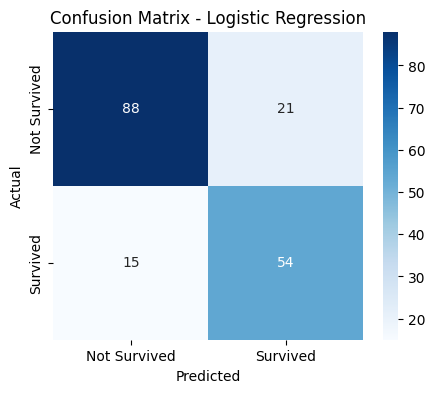

In [30]:
# ====== Confusion Matrix ======
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### **2. Decision Tree**

In [31]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

Accuracy: 0.8146067415730337

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       109
           1       0.78      0.72      0.75        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



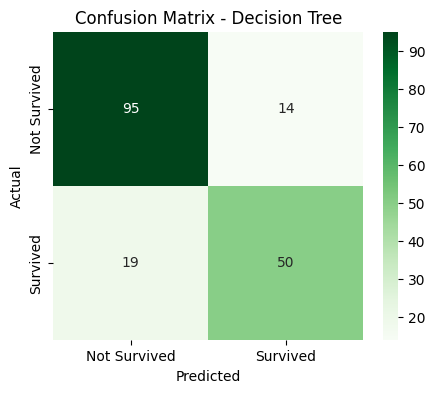

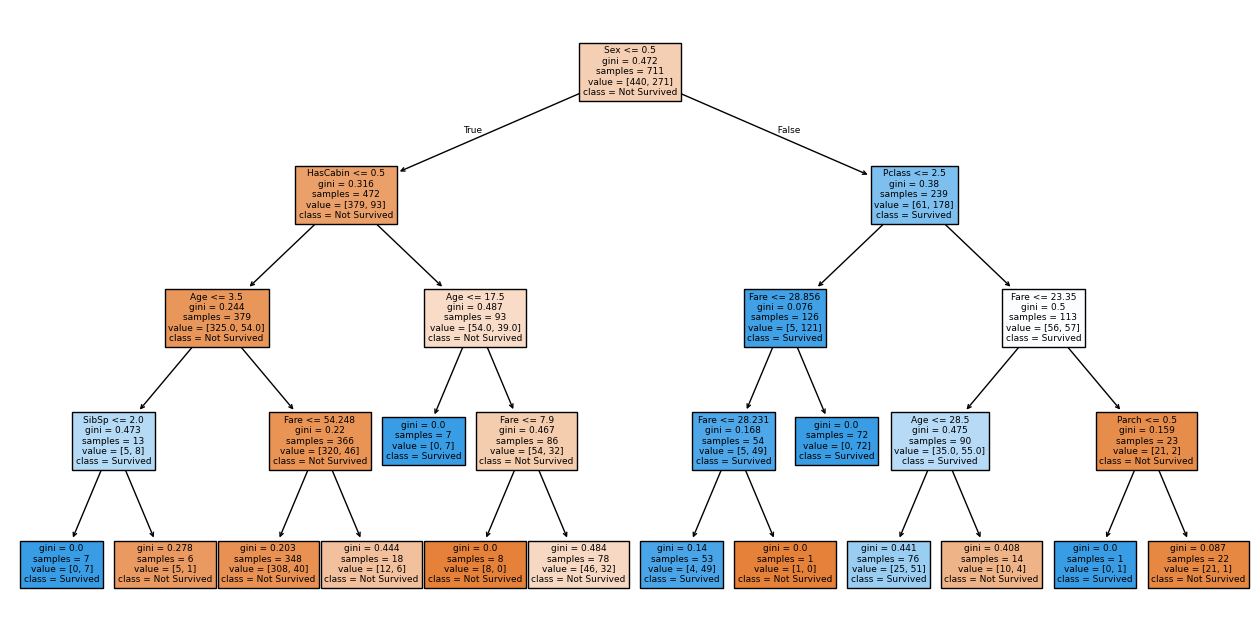

In [32]:
# ====== Train Decision Tree ======
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# ====== Predictions & Evaluation ======
y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ====== Confusion Matrix ======
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# ====== Optional: Visualize Decision Tree ======
plt.figure(figsize=(16,8))
plot_tree(dt_model, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.show()

### **3. Random forest**

In [33]:
from sklearn.ensemble import RandomForestClassifier

Accuracy: 0.797752808988764

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       109
           1       0.76      0.70      0.73        69

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178



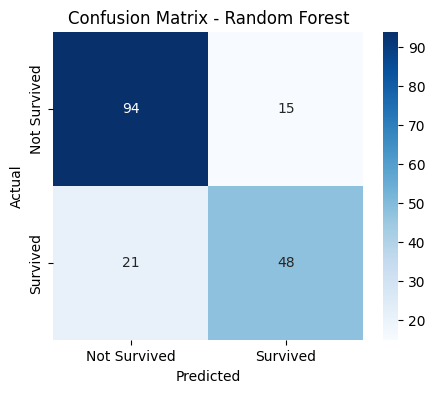


Feature Importances:
     Feature  Importance
1       Sex    0.429609
5      Fare    0.177126
0    Pclass    0.117591
2       Age    0.100129
7  HasCabin    0.055725
3     SibSp    0.052269
6  Embarked    0.035520
4     Parch    0.032031


In [34]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# ====== Predictions & Evaluation ======
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ====== Confusion Matrix ======
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ====== Feature Importance ======
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:\n", feature_importances)

### **4. Gradient Boosting**

Accuracy: 0.8089887640449438

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       109
           1       0.77      0.72      0.75        69

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



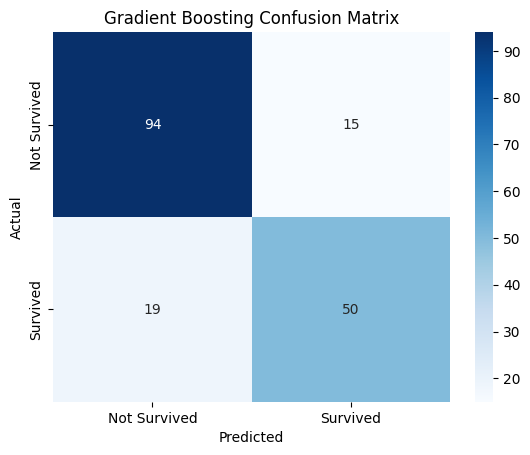

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predictions
y_pred = gb_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

### **5. XGBoost**

In [36]:
import xgboost as xgb

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:13:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.797752808988764

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       109
           1       0.75      0.71      0.73        69

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178



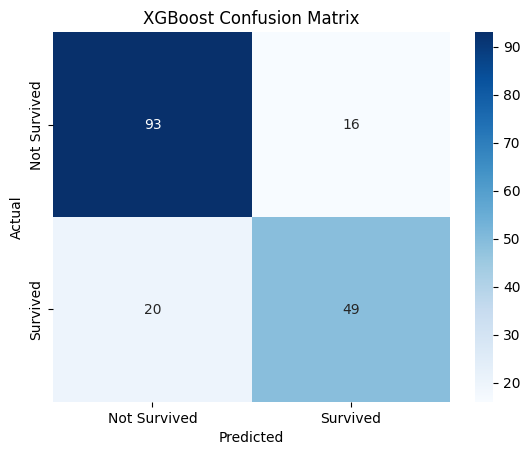

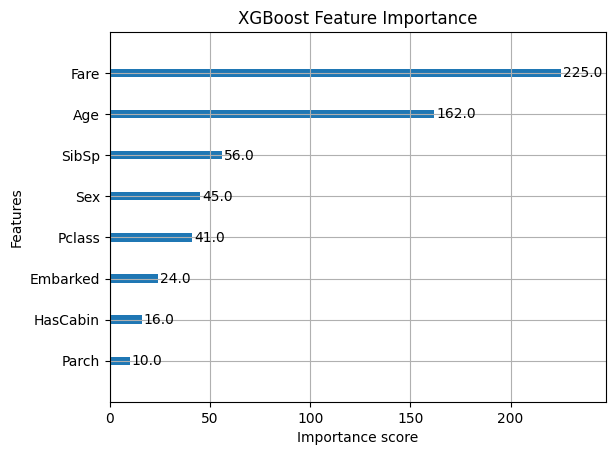

In [37]:
# Create the model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Survived", "Survived"],
            yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()

# Feature importance plot
xgb.plot_importance(xgb_model)
plt.title("XGBoost Feature Importance")
plt.show()

**Types of importance:**

weight → split count (default)

gain → average improvement in accuracy brought by a feature

cover → average number of samples affected by splits on the feature

In [38]:
import pandas as pd

booster = xgb_model.get_booster()
importance_types = ['weight', 'gain', 'cover']

for imp_type in importance_types:
    importance_dict = booster.get_score(importance_type=imp_type)
    importance_df = pd.DataFrame({
        'Feature': list(importance_dict.keys()),
        imp_type: list(importance_dict.values())
    }).sort_values(by=imp_type, ascending=False)
    print(f"\nFeature importance by {imp_type}:")
    print(importance_df)



Feature importance by weight:
    Feature  weight
5      Fare   225.0
2       Age   162.0
3     SibSp    56.0
1       Sex    45.0
0    Pclass    41.0
6  Embarked    24.0
7  HasCabin    16.0
4     Parch    10.0

Feature importance by gain:
    Feature       gain
1       Sex  25.522989
0    Pclass   8.217704
7  HasCabin   7.194968
3     SibSp   2.761866
6  Embarked   2.616869
2       Age   2.138919
5      Fare   2.065093
4     Parch   0.872536

Feature importance by cover:
    Feature       cover
1       Sex  107.587357
7  HasCabin   86.190620
6  Embarked   57.026363
2       Age   47.653919
5      Fare   46.727486
3     SibSp   46.472725
0    Pclass   40.802773
4     Parch   29.256088


In [39]:
model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)
# Get gain scores
booster = model.get_booster()
gain_dict = booster.get_score(importance_type='gain')

# Sort by gain
sorted_features = sorted(gain_dict.items(), key=lambda x: x[1], reverse=True)
top_features = [f[0] for f in sorted_features[:5]]  # top 5 features, adjust number as needed

print("Top features by gain:", top_features)
# Filter training and test sets
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Retrain model
model_top = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
model_top.fit(X_train_top, y_train)

# Evaluate
y_pred = model_top.predict(X_test_top)
print("Accuracy with top gain features:", accuracy_score(y_test, y_pred))


Top features by gain: ['Sex', 'Pclass', 'HasCabin', 'SibSp', 'Fare']
Accuracy with top gain features: 0.8146067415730337


### **6. LightGBM**

In [40]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Create and train LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 271, number of negative: 440
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381153 -> initscore=-0.484656
[LightGBM] [Info] Start training from score -0.484656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(random_state=42)

In [41]:
# Get gain-based feature importance
importance_gain = lgb_model.booster_.feature_importance(importance_type='gain')
feature_names = lgb_model.booster_.feature_name()

# Combine into a sorted list
gain_df = sorted(zip(feature_names, importance_gain), key=lambda x: x[1], reverse=True)

print("Feature importance by gain:")
for feat, gain in gain_df:
    print(f"{feat}: {gain}")


Feature importance by gain:
Sex: 1167.8010466233827
Fare: 957.5442986189737
Age: 814.8689667056924
Pclass: 384.242873813957
HasCabin: 143.4537806659937
SibSp: 136.80869058342023
Embarked: 123.24608814349631
Parch: 61.203205091187556


In [42]:
# Select top 5 features (adjust as needed)
top_features = [f[0] for f in gain_df[:5]]

X_train_top = X_train[top_features]
X_test_top = X_test[top_features]


In [43]:
lgb_model_top = lgb.LGBMClassifier(random_state=42)
lgb_model_top.fit(X_train_top, y_train)

# Predict & evaluate
y_pred_top = lgb_model_top.predict(X_test_top)
print("Accuracy with top gain features:", accuracy_score(y_test, y_pred_top))


[LightGBM] [Info] Number of positive: 271, number of negative: 440
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 185
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381153 -> initscore=-0.484656
[LightGBM] [Info] Start training from score -0.484656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


### **7. CatBoost**

In [44]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [45]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score

# Train initial CatBoost model
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    eval_metric='Accuracy',
    random_seed=42,
    verbose=0
)

cat_model.fit(X_train, y_train)

# Get feature importance by 'PredictionValuesChange' (like gain)
feature_importance = cat_model.get_feature_importance(Pool(X_train, y_train), type='PredictionValuesChange')
feature_names = X_train.columns

# Combine into sorted list
importance_df = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)

print("CatBoost Feature Importance (Gain-like metric):")
for feat, score in importance_df:
    print(f"{feat}: {score:.4f}")

# Select top N features
top_features = [feat for feat, score in importance_df[:5]]
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Retrain using top features
cat_model_top = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    eval_metric='Accuracy',
    random_seed=42,
    verbose=0
)
cat_model_top.fit(X_train_top, y_train)

# Evaluate
y_pred_top = cat_model_top.predict(X_test_top)
print("Accuracy with top gain features:", accuracy_score(y_test, y_pred_top))


CatBoost Feature Importance (Gain-like metric):
Sex: 25.5864
Fare: 23.9763
Age: 20.8001
Pclass: 9.8859
SibSp: 6.5312
Embarked: 6.1572
Parch: 3.5591
HasCabin: 3.5038
Accuracy with top gain features: 0.8314606741573034


### **8. SVM**

In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Assuming X and y are already prepared
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (SVM works better with scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[97 12]
 [20 49]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       109
           1       0.80      0.71      0.75        69

    accuracy                           0.82       178
   macro avg       0.82      0.80      0.81       178
weighted avg       0.82      0.82      0.82       178



# **Testing Data using CatBoost**

In [47]:
dft.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
dft.shape

(418, 11)

In [49]:
dft = dft.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [50]:
dft.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Cabin,327
Embarked,0


In [51]:
dft['Age'] = dft['Age'].fillna(dft['Age'].median())

In [52]:
dft['HasCabin'] = dft['Cabin'].notnull().astype(int)

In [53]:
dft = dft.drop(['Cabin'], axis=1)

In [54]:
dft['Fare'] = dft['Fare'].fillna(dft['Fare'].median())

In [55]:
# Convert categorical text values into numerical codes for model compatibility
# 'Sex': male → 0, female → 1
dft["Sex"] = dft["Sex"].map({"male": 0, "female": 1})

In [56]:
dft['Embarked'] = dft['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

In [57]:
dft.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin
0,3,0,34.5,0,0,7.8292,3,0
1,3,1,47.0,1,0,7.0000,1,0
2,2,0,62.0,0,0,9.6875,3,0
3,3,0,27.0,0,0,8.6625,1,0
4,3,1,22.0,1,1,12.2875,1,0


In [58]:
new_data_top = dft[top_features]

# Predict
predictions = cat_model_top.predict(new_data_top)

# If you need probability scores
# predictions_proba = cat_model_top.predict_proba(new_data_top)[:, 1]

# Save predictions to file
output = pd.DataFrame({
    "PassengerId": pd.read_csv("test.csv")["PassengerId"],
    "Survived": predictions
})
output.to_csv("gender_submission.csv", index=False)

print("Predictions saved.")

Predictions saved.
